# **Telco Customer Churn Data**

### Introduction

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

| **Variable**| **Description**| **Type** |
| - | - | - |
| CustomerID | A unique ID that identifies each customer | categorical |
| Count | A value used in reporting/dashboarding to sum up the number of customers| numerical |
| Country| The country of the customer| categorical |
| State| The state of the customer| categorical |
| City| The city of the customer| categorical |
| Zip Code| The zip code of the customer| categorical |
| Lat Long| The combined latitude and longitude of the customer| categorical |
| Latitude| The latitude of the customer|  numerical |
| Longitude| The longitude of the customer|  numerical |
| Gender| The customer’s gender| categorical |
| Senior Citizen| Indicates if the customer is 65 or older| categorical |
| Partner| Indicate if the customer has a partner| categorical |
| Dependents| Indicates if the customer lives with any dependents| categorical |
| Tenure Months| Customer has been with the company by the end of the quarter specified above.| numerical |
| Phone Service| Subscribes to home phone service with the company | categorical |
| Multiple Lines| Subscribes to multiple telephone lines with the company | categorical |
| Internet Service| Subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.| categorical |
| Online Security| Online security service provided by the company | categorical |
| Online Backup| Online backup service provided by the company | categorical |
| Device Protection| Device protection plan for their Internet equipment provided by the company |categorical |
| Tech Support| Technical support plan from the company with reduced wait times | categorical |
| Streaming TV| Customer uses their Internet service to stream television programing from a third party provider | categorical |
| Streaming Movies| Customer uses their Internet service to stream movies from a third party provider | categorical |
| Contract | Customer’s current contract type| categorical |
| Paperless Billing | Customer has chosen paperless billing | categorical |
| Payment Method | Customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check| categorical |
| Monthly Charge | Current total monthly charge for all their services from the company | numerical |
| Total Charges | Total charges, calculated to the end of the quarter specified above | numerical |
| Churn Label | Yes = the customer left the company this quarter. No = the customer remained with the company| categorical |
| Churn Value | 1 = the customer left the company this quarter. 0 = the customer remained with the company|  categorical |
| Churn Score | A value from 0-100 that is calculated using the predictive tool| numerical |
| CLTV |Calculated using corporate formulas and existing data | numerical |
| Churn Reason | A customer’s specific reason for leaving the company. Directly related to Churn Category | categorical |



Count of variables we have:

|**Type**|**Count**|
|-|-|
|categorical|25|
|numerical|8|

### Importing required libraries

In [4]:
import numpy as np # data handling library
import pandas as pd # data manipulation library
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
import missingno as msno # data visualization library for missing data

#### Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

In [5]:
df = pd.read_excel(r'C:\Users\mdali\Desktop\data_science\projects\Churn_Analysis\Telco_customer_churn.xlsx') # importing the data
df.shape # shape of our data

(7043, 33)

In [6]:
print('Number of observations    : ', df.shape[0]) # number of rows in dataset
print('Number of variables       : ', df.shape[1]) # number of columns in dataset

Number of observations    :  7043
Number of variables       :  33


In [7]:
df = df.drop_duplicates() # dropping duplicates
df.shape # checking shape of data after dropping duplicates

(7043, 33)

In [8]:
df.columns # columns we have in our dataset

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [9]:
# for better analysis removing extra spaces from variables 
df = df.rename(columns={'Zip Code':'ZipCode',
                'Lat Long':'LatLong',
                'Senior Citizen':'SeniorCitizen',
                'Tenure Months':'TenureMonths',
                'Phone Service':'PhoneService',
                'Multiple Lines':'MultipleLines', 
                'Internet Service':'InternetService',
                'Online Security':'OnlineSecurity',
                'Online Backup':'OnlineBackup',
                'Device Protection':'DeviceProtection',
                'Tech Support':'TechSupport',
                'Streaming TV':'StreamingTV',
                'Streaming Movies':'StreamingMovies',
                'Paperless Billing':'PaperlessBilling',
                'Payment Method':'PaymentMethod',
                'Monthly Charges':'MonthlyCharges',
                'Total Charges':'TotalCharges', 
                'Churn Label':'ChurnLabel', 
                'Churn Value':'ChurnValue',
                'Churn Score':'ChurnScore', 
                'Churn Reason':'ChurnReason'})
df.columns # viewing columns if they got renamed or not

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'ZipCode', 'LatLong',
       'Latitude', 'Longitude', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'TenureMonths', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'ChurnLabel', 'ChurnValue', 'ChurnScore', 'CLTV', 'ChurnReason'],
      dtype='object')

In [10]:
df.head().T # viewing first 5 rows in transverse

,0,1,2,3,4
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
Count,1,1,1,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
ZipCode,90003,90005,90006,90010,90015
LatLong,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.964131,34.059281,34.048013,34.062125,34.039224
Longitude,-118.272783,-118.30742,-118.293953,-118.315709,-118.266293
Gender,Male,Female,Female,Female,Male


In [11]:
df.tail().T # viewing last 5 rows in transverse

,7038,7039,7040,7041,7042
CustomerID,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
Count,1,1,1,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California
City,Landers,Adelanto,Amboy,Angelus Oaks,Apple Valley
ZipCode,92285,92301,92304,92305,92308
LatLong,"34.341737, -116.539416","34.667815, -117.536183","34.559882, -115.637164","34.1678, -116.86433","34.424926, -117.184503"
Latitude,34.341737,34.667815,34.559882,34.1678,34.424926
Longitude,-116.539416,-117.536183,-115.637164,-116.86433,-117.184503
Gender,Female,Male,Female,Female,Male


In [12]:
df.info() # checking for null values and data types of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [13]:
# here Zip Code, ChurnValue Total Charges are wrongly read
df['ZipCode'] = df['ZipCode'].astype('category') # changing ZipCode to category data type 
df['ChurnValue'] = df['ChurnValue'].astype('category') # changing ChurnValue to category data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # changing TotalCharges to numerical data type

In [14]:
cat_col = df.select_dtypes(include='object').columns # taking out our categorical variables
df[cat_col]=df[cat_col].astype('category') # changing data type to category
cat_col # viewing our categorical variables

Index(['CustomerID', 'Country', 'State', 'City', 'LatLong', 'Gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'ChurnLabel',
       'ChurnReason'],
      dtype='object')

In [15]:
num_col = df.select_dtypes(include='number').columns # taking out our numerical variables
num_col # viewing our numerical variables

Index(['Count', 'Latitude', 'Longitude', 'TenureMonths', 'MonthlyCharges',
       'TotalCharges', 'ChurnScore', 'CLTV'],
      dtype='object')

In [16]:
df.info() # checking if our data types of variables got changed or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CustomerID        7043 non-null   category
 1   Count             7043 non-null   int64   
 2   Country           7043 non-null   category
 3   State             7043 non-null   category
 4   City              7043 non-null   category
 5   ZipCode           7043 non-null   category
 6   LatLong           7043 non-null   category
 7   Latitude          7043 non-null   float64 
 8   Longitude         7043 non-null   float64 
 9   Gender            7043 non-null   category
 10  SeniorCitizen     7043 non-null   category
 11  Partner           7043 non-null   category
 12  Dependents        7043 non-null   category
 13  TenureMonths      7043 non-null   int64   
 14  PhoneService      7043 non-null   category
 15  MultipleLines     7043 non-null   category
 16  InternetService   7043 n

 #### Q2: Please apply appropriate statistical measures using python based on data types.

In [17]:
df[cat_col].describe().T # statistical measures of categorical variables  

,count,unique,top,freq
CustomerID,7043,7043,0002-ORFBO,1
Country,7043,1,United States,7043
State,7043,1,California,7043
City,7043,1129,Los Angeles,305
LatLong,7043,1652,"32.555828, -117.040073",5
Gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,5416
PhoneService,7043,2,Yes,6361


In [18]:
df = df.drop(columns=['Country','State']) #dropping country and state as it is same for all observations

In [19]:
df[num_col].describe().T # statistical measures of numerical variables

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
TenureMonths,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7032.0,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000
ChurnScore,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


In [20]:
df = df.drop(columns=['Count']) #dropping count as it is same for all observations

In [21]:
# again configuring as we have dropped some variables
cat_col = cat_col = df.select_dtypes(include='category').columns
num_col = df.select_dtypes(include='number').columns

In [22]:
df.isna().sum().T

CustomerID             0
City                   0
ZipCode                0
LatLong                0
Latitude               0
Longitude              0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
TenureMonths           0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
ChurnLabel             0
ChurnValue             0
ChurnScore             0
CLTV                   0
ChurnReason         5174
dtype: int64

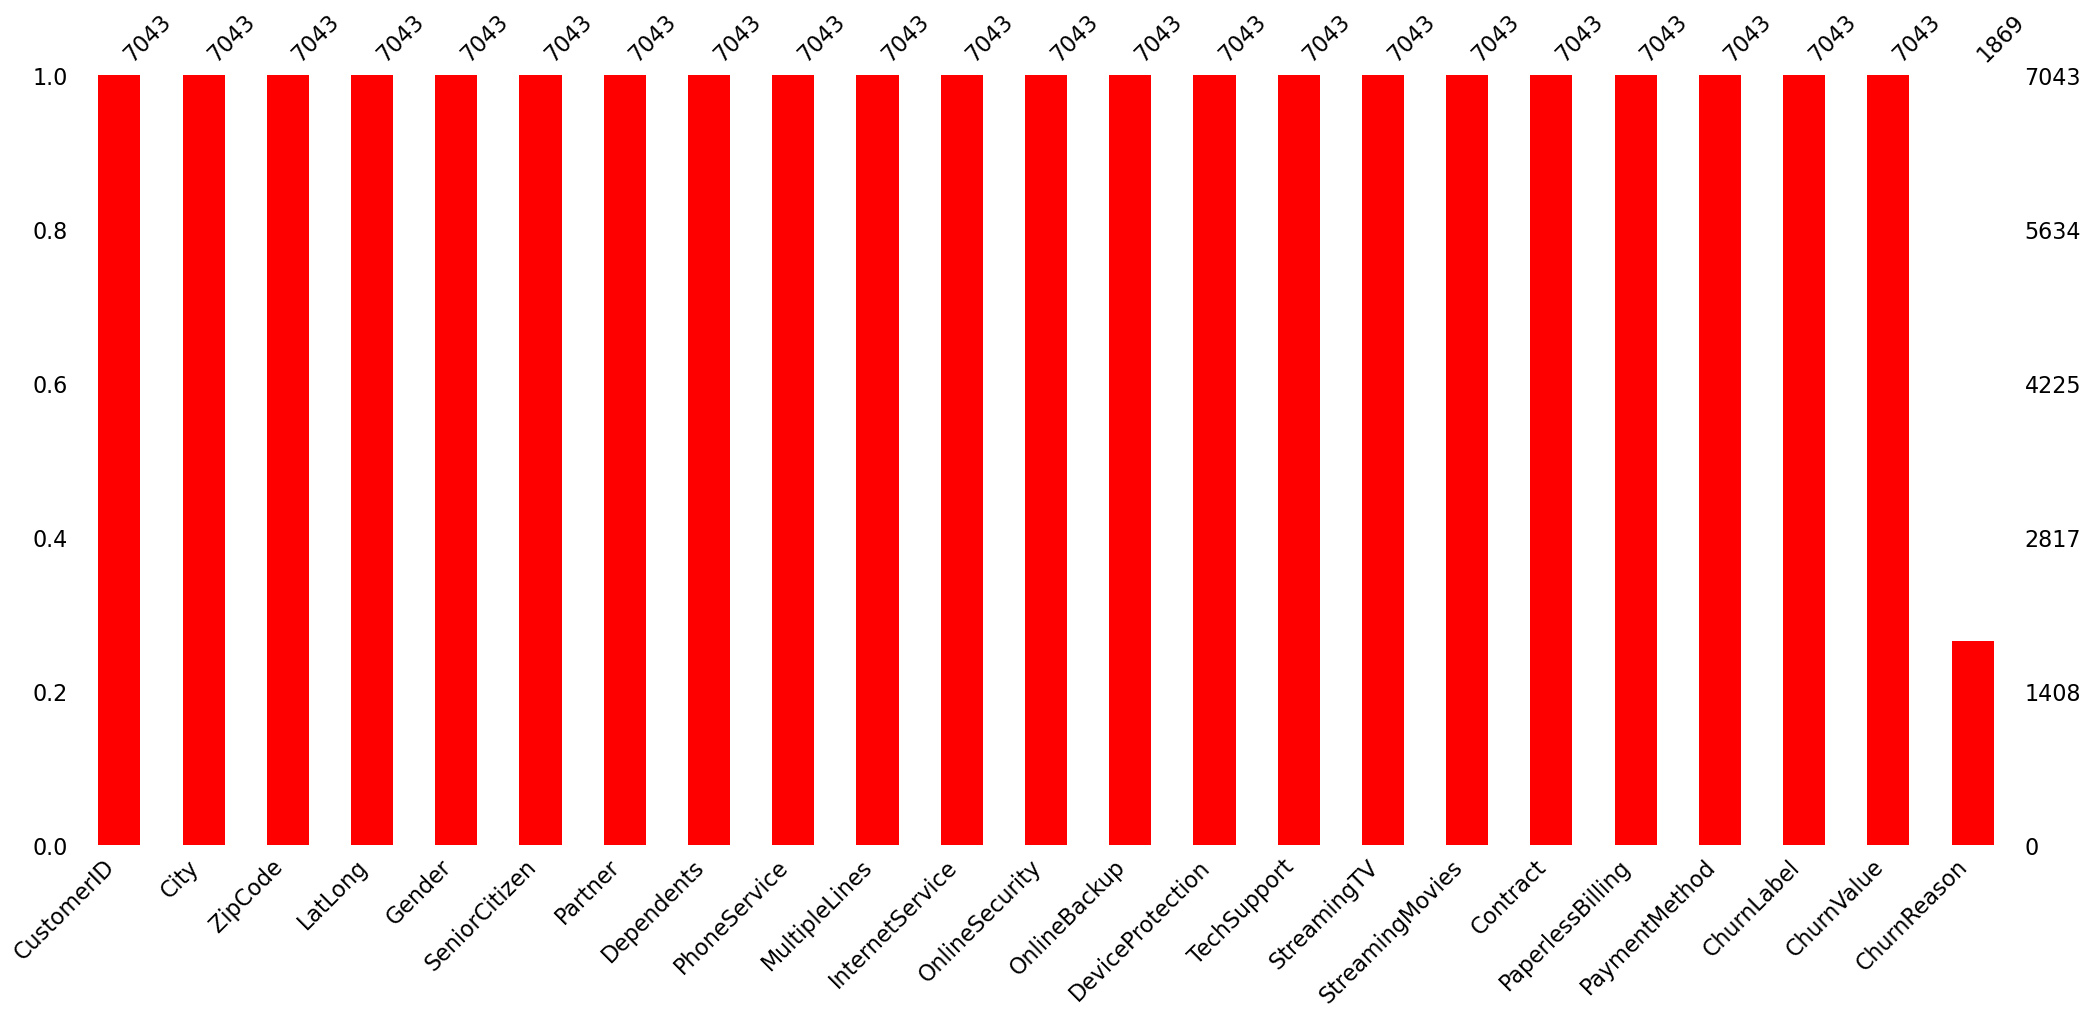

In [23]:
msno.bar(df[cat_col], color='r') # visualizing missing values in categorical variables
plt.show() # visualizing the chart

In [24]:
df['ChurnReason'].value_counts() # checking for count and type of entries we have in ChurnReason

ChurnReason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: co

- here ChurnReason has many empty values more than 70% data is missing so dropping it will more nice 
- other than that no other variables has null values or empty values 

In [25]:
df = df.drop(columns=['ChurnReason']) # dropping ChurnReason variable

In [26]:
# again configuring as we have dropped some variables
cat_col = cat_col = df.select_dtypes(include='category').columns
num_col = df.select_dtypes(include='number').columns

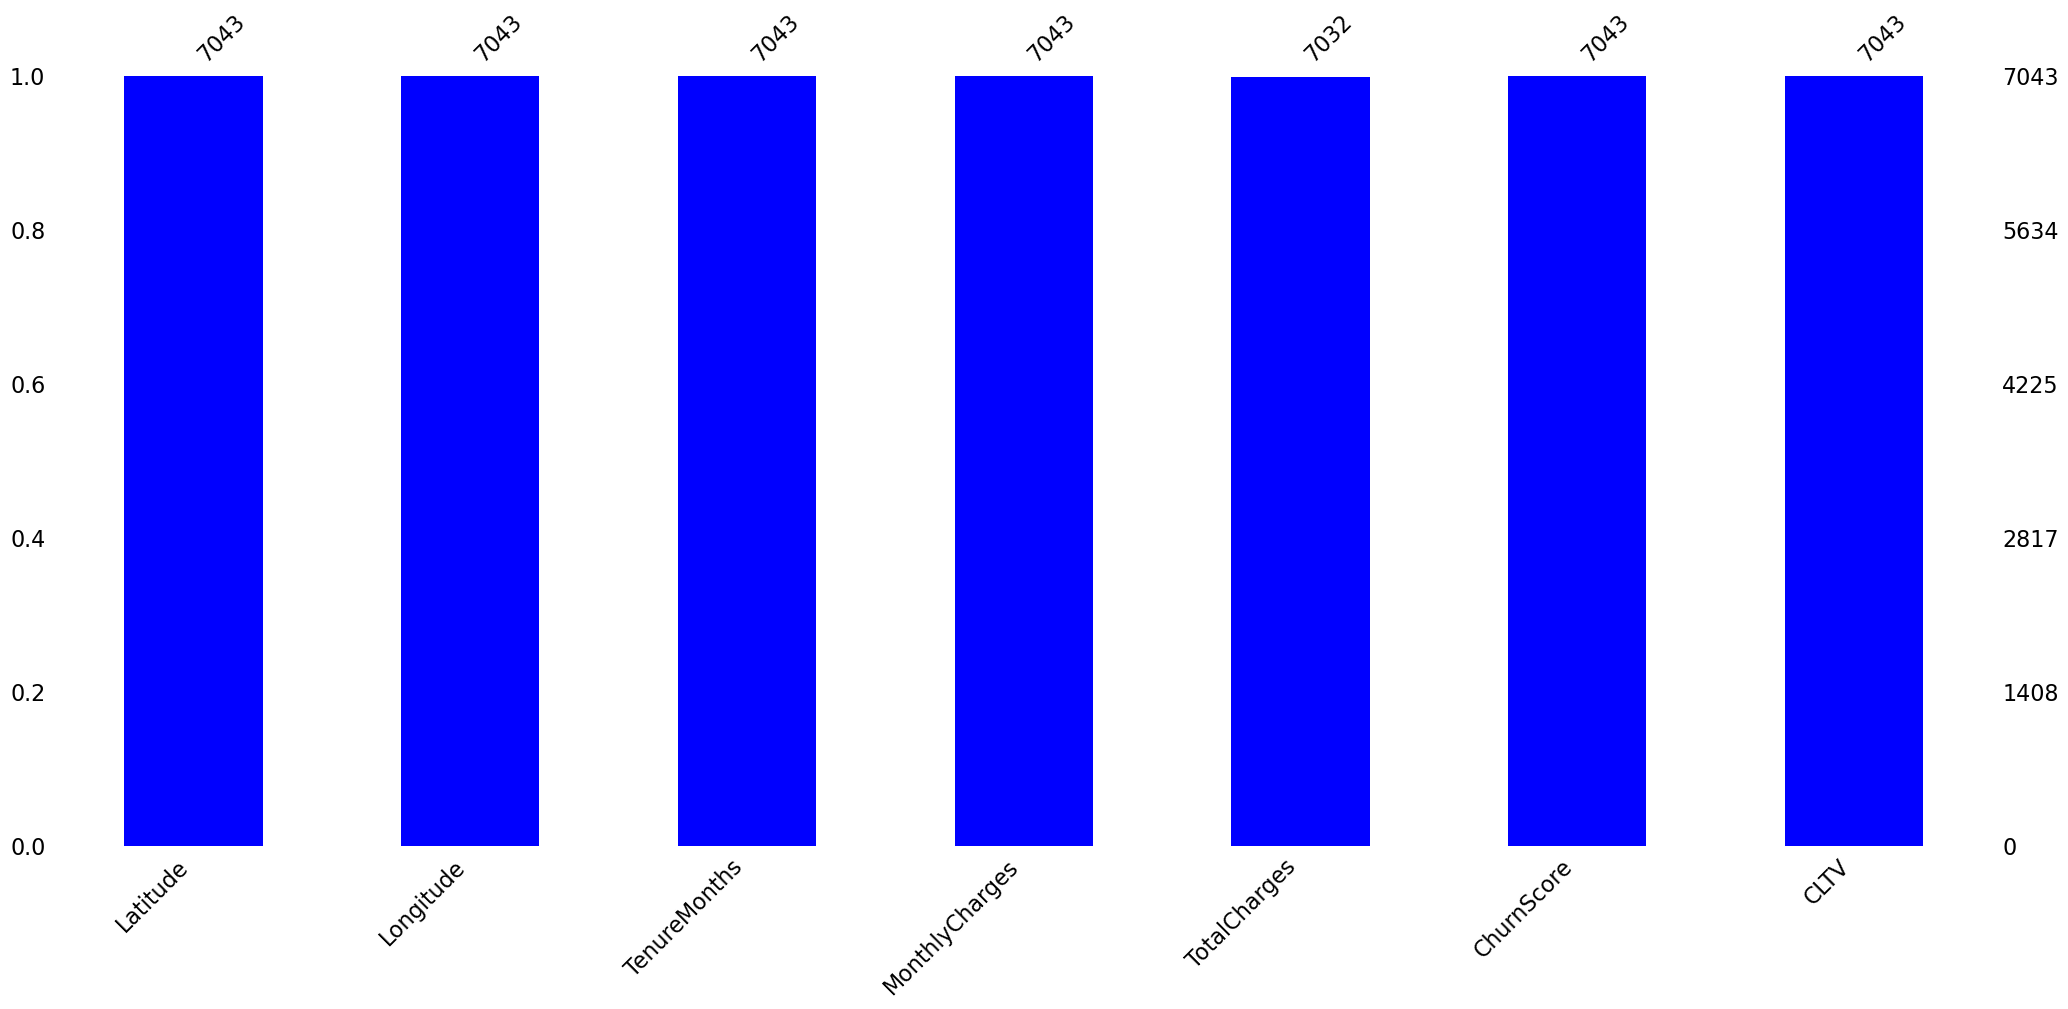

In [27]:
msno.bar(df[num_col], color='b') # visualzing missing values in numerical variables
plt.show() # visualizing the chart

- there are some missing values in Total Charges

In [28]:
df['TotalCharges'].isna().sum() # checking for how much null values we have

11

In [29]:
df.dropna(inplace=True) # dropping null values from our dataset

In [30]:
df.shape # checking shape of our data after removing null values

(7032, 29)

#### Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

In [31]:
df['Gender'].value_counts() #checking for count and type of entries we have in Gender

Gender
Male      3549
Female    3483
Name: count, dtype: int64

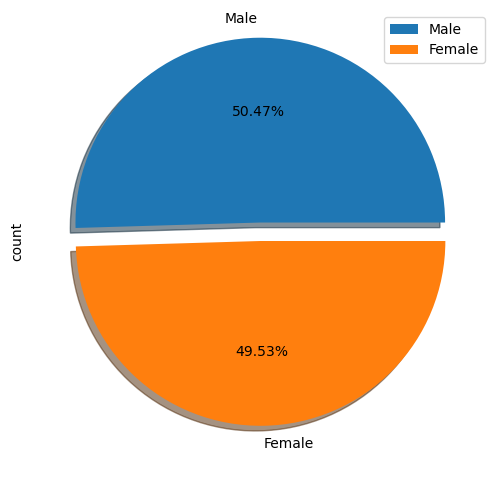

In [32]:
plt.figure(figsize=(10,6)) # giving figure size
df['Gender'].value_counts().plot(kind='pie',autopct='%1.2f%%',shadow=True, explode = (0.1,0)) # configuring our pie chart
plt.legend() # for showing legend in chart
plt.show() # visualizing the chart

- In our dataset we have Male as 50.47% with 3549 counts.
- Where as for Female we have 49.53% with 3483 counts.

In [33]:
df['SeniorCitizen'].value_counts() # checking for count and type of entries we have in SeniorCitizen

SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64

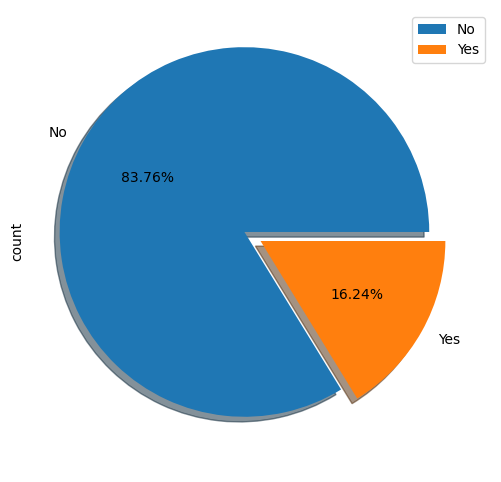

In [34]:
plt.figure(figsize=(10,6)) # giving figure size
df['SeniorCitizen'].value_counts().plot(kind='pie', autopct='%1.2f%%',shadow = True,explode = (0.1,0)) # configuring our pie chart
plt.legend() # for showing legend in chart
plt.show() # visualizing the chart

- In our dataset we have Senior Citizen as 16.24% with 1142 counts.

#### Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

c:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

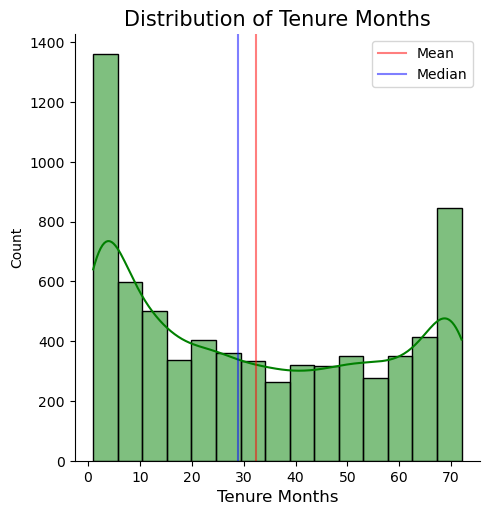

In [35]:
plt.figure(figsize=(10,6)) # giving figure size
sns.displot(data=df, x = 'TenureMonths', kde=True, color='green') # configuring our distribution chart
plt.axvline(x=df['TenureMonths'].mean(), color='red', alpha=0.5, label= 'Mean') # creating Mean line in chart
plt.axvline(x=df['TenureMonths'].median(), color='blue', alpha=0.5, label= 'Median') # creating Median line in chart
plt.title('Distribution of Tenure Months', fontsize = 15) # giving title and its size
plt.xlabel('Tenure Months',fontsize = 12) # giving x-axis title and its size
plt.legend() # for showing legend in chart
plt.show() # visualizing the chart

In [36]:
print('Mean     : ' , round(df['TenureMonths'].mean(),2)) # mean of TenureMonths
print('Median   : ' , round(df['TenureMonths'].median(),2)) # median of TenureMonths
print('Skewness : ' , round(df['TenureMonths'].skew(),2)) # skewness of TenureMonths

Mean     :  32.42
Median   :  29.0
Skewness :  0.24


- here mean and median is almost same
- also skewness is 0.24 which comes in range of symmetrical 
- so we can say that TenureMonths is almost symmetrical

#### Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

In [37]:
df[cat_col].describe().T # statistical measures of categorical variables

,count,unique,top,freq
CustomerID,7032,7032,0002-ORFBO,1
City,7032,1129,Los Angeles,304
ZipCode,7032,1652,90001,5
LatLong,7032,1652,"32.555828, -117.040073",5
Gender,7032,2,Male,3549
SeniorCitizen,7032,2,No,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,5412
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385


In [38]:
bin_col = [] # creating binary columns list
for i in cat_col: # looping through categorical columns
    if df[i].nunique()==2: # giving condition for number of unique should be 2
        bin_col.append(i) # if condition met then adding value to binary list
bin_col # viewing our binary column list

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'ChurnLabel',
 'ChurnValue']

In [39]:
from sklearn.preprocessing import LabelEncoder # importing required library
lbl = LabelEncoder() # creating object
for i in bin_col: # looping through binary columns
    df[f'transformed_{i}'] = lbl.fit_transform(df[i]) # transforming them into zero and one
    print(df[f'transformed_{i}'].value_counts()) # confirming if they got transformed or not

transformed_Gender
1    3549
0    3483
Name: count, dtype: int64
transformed_SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
transformed_Partner
0    3639
1    3393
Name: count, dtype: int64
transformed_Dependents
0    5412
1    1620
Name: count, dtype: int64
transformed_PhoneService
1    6352
0     680
Name: count, dtype: int64
transformed_PaperlessBilling
1    4168
0    2864
Name: count, dtype: int64
transformed_ChurnLabel
0    5163
1    1869
Name: count, dtype: int64
transformed_ChurnValue
0    5163
1    1869
Name: count, dtype: int64


#### Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also.

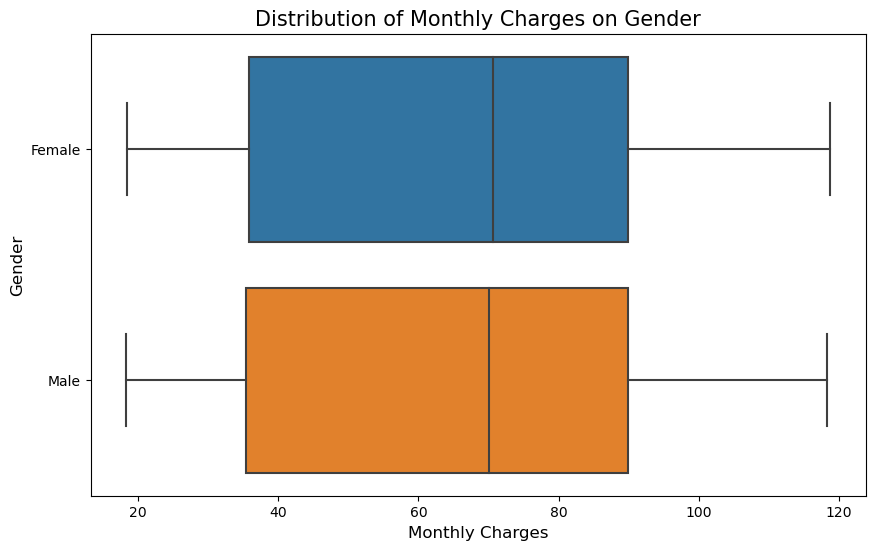

In [40]:
plt.figure(figsize=(10,6)) # giving figure size
sns.boxplot(data=df, x='MonthlyCharges', y='Gender') # configuring our box chart
plt.title('Distribution of Monthly Charges on Gender',fontsize = 15) # giving title and its size
plt.xlabel('Monthly Charges', fontsize = 12) # giving x-axis title and its size
plt.ylabel('Gender', fontsize = 12) # giving y-axis title and its size
plt.show() # visualizing the chart

- both male and female are left skewed as median line is more towards right side 
- median is almost same for both of genders
- minimum and maximums are also nearly same for both genders, same is with IQR
- also we don't have any outliers

#### Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

In [41]:
result1 = df.groupby('City').agg({'TotalCharges': ['min', 'max']}) # grouping City values with Total Charges
result1.loc['Los Angeles']  # Locating los angeles in our grouped variable

TotalCharges  min      18.80
              max    8375.05
Name: Los Angeles, dtype: float64

- Minimum total charges for Los Angeles is - 18.80

In [42]:
result2 = df.groupby('ZipCode').agg({'TotalCharges': ['max']}) # grouping ZipCodes values with Total Charges
result2[max].sort_values(ascending=False) # sorting zip codes on max values 

ZipCode
95519    8684.80
95461    8672.45
90822    8670.10
92230    8594.40
92614    8564.75
          ...   
92305     346.45
96161     305.55
95551     279.30
94520     256.60
96110      81.70
Name: (TotalCharges, max), Length: 1652, dtype: float64

- Maximum total charges is for this zip code 95519 - 8684.80

#### Q8: Please find which payment method has the highest churn score and which has the lowest churn score.

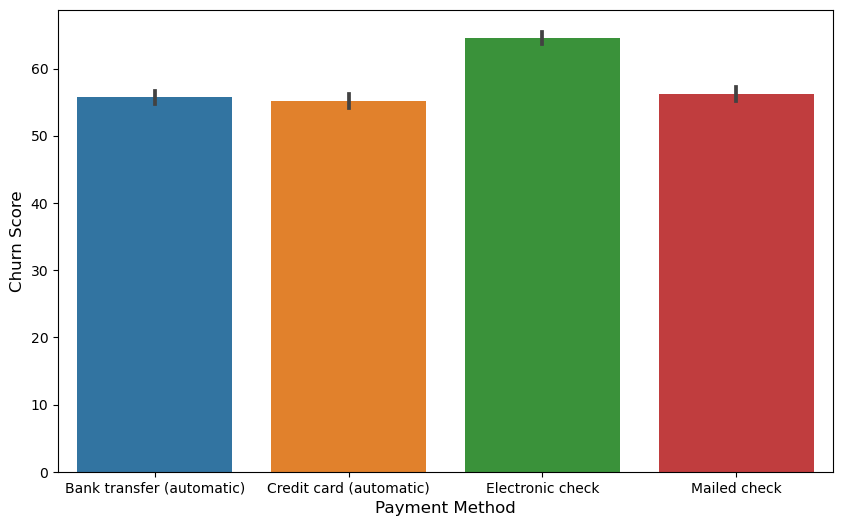

In [43]:
plt.figure(figsize=(10,6)) # giving figure size
sns.barplot(data=df, y='ChurnScore', x='PaymentMethod') # configuring our bar chart
plt.xlabel('Payment Method', fontsize = 12) # giving x-axis title and its size
plt.ylabel('Churn Score', fontsize = 12) # giving y-axis title and its size
plt.show() # visualizing the chart

- Electronic Check has highest score 
- Credit Card has lowest score

#### Q9: Please create an appropriate plot to check the count of payment methods and explain it.

In [44]:
df['PaymentMethod'].value_counts() #checking for count and type of entries we have in Payment Method

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

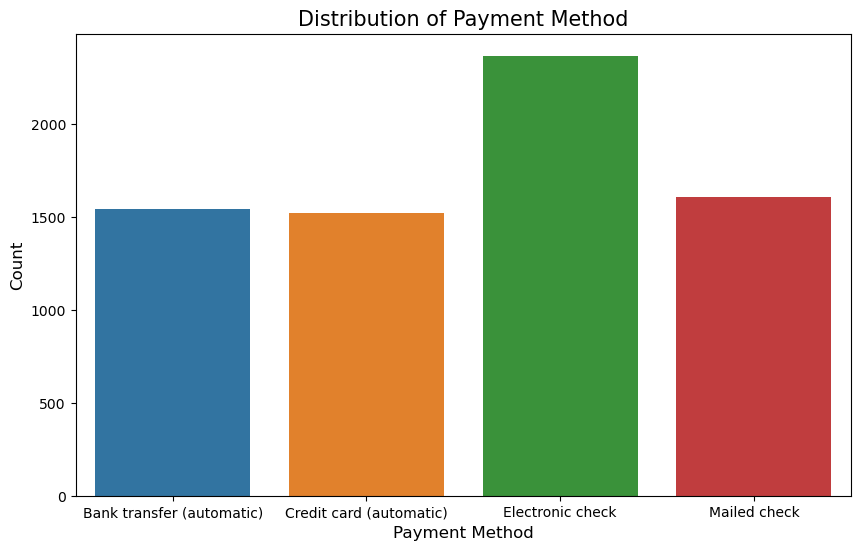

In [45]:
plt.figure(figsize=(10,6)) # giving figure size
sns.countplot(data=df, x = 'PaymentMethod') # configuring our count chart
plt.title('Distribution of Payment Method',fontsize= 15) # giving title and its size
plt.xlabel('Payment Method', fontsize = 12) # giving x-axis title and its size
plt.ylabel('Count', fontsize = 12) # giving y-axis title and its size
plt.show() # visualizing the chart

- Electronic check has highest number of counts - 2365
- followed by Mailed Check - 1604 and Bank Transfer - 1542
- least number of count has Credit Card - 1521

#### Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.

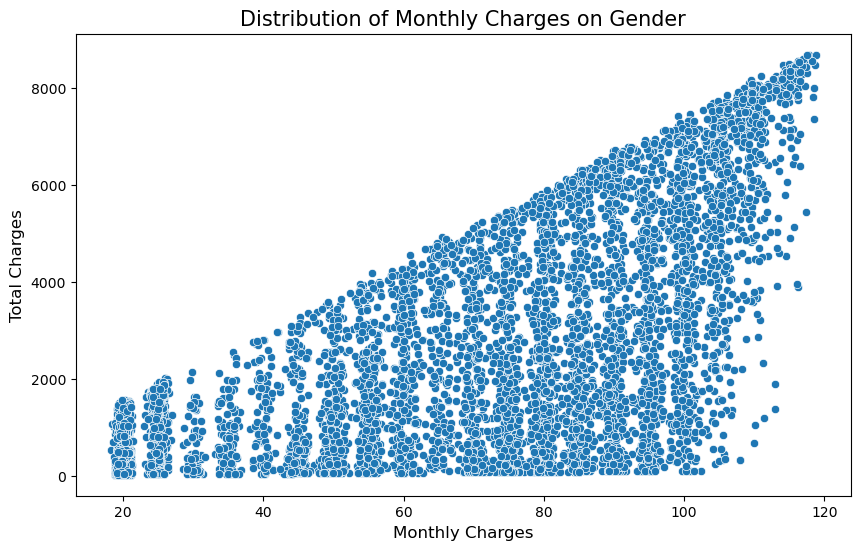

In [46]:
plt.figure(figsize=(10,6)) # giving figure size
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges')  # configuring our scatter chart
plt.title('Distribution of Monthly Charges on Gender',fontsize = 15)  # giving title and its size
plt.xlabel('Monthly Charges', fontsize = 12) # giving x-axis title and its size
plt.ylabel('Total Charges', fontsize = 12) # giving y-axis title and its size
plt.show() # visualizing the chart

In [47]:
round(df[['MonthlyCharges','TotalCharges']].corr(),2)

,MonthlyCharges,TotalCharges
MonthlyCharges,1.00,0.65
TotalCharges,0.65,1.00


- here in scatter plot as monthly charges increases total charges increases.
- they show correlation value of 0.65 which means they are correlated.